In [48]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
from pandas import DataFrame
import statistics
from statistics import mean
import numpy as np
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.svm import LinearSVC

In [2]:
processed_train = pd.read_csv("train_processed.csv")
processed_test = pd.read_csv("test_processed.csv")
orgin_test = pd.read_csv("data/test/test.csv").loc[:,["Id","Cover_Type"]]

In [3]:
#Set Y for training set
train_Y = processed_train.loc[:,["Cover_Type"]].to_numpy()

In [4]:
train_dropped_X = processed_train.drop("Cover_Type",axis=1)

In [5]:
#Set X for training set
train_X = train_dropped_X.iloc[:, 1:].to_numpy()

In [6]:
processed_test['Cover_Type']= orgin_test["Cover_Type"]

In [7]:
#Set X and Y for testing set
test_X = processed_test.iloc[:, 1:-1].to_numpy()
test_Y = processed_test['Cover_Type']

In [17]:
#Accuracy calculation function
def cal_accuracy_score(test,predict):
    return accuracy_score(test,predict)

In [70]:
#This is the function to plot a confusion matrix
def plot_cm(array,tt):
    df_cm = pd.DataFrame(array, range(1,8), range(1,8))
    sns.set(font_scale=1) # for label size
    plt.figure(figsize=(10,9))
    sns.heatmap(df_cm, annot=True, annot_kws={"size": 10}, cmap="YlGnBu" ).set_title(tt)
    plt.show()

In [74]:
#Knn function using sklearn
def kNN(neigh_num, X, y, test_X):
    neigh = KNeighborsClassifier(neigh_num, weights="distance")
    neigh.fit(X, y)
    return neigh.predict(test_X)

In [75]:
#Tuning parameter K
para_result0 = {}
for i in [1,2,3,5,10]:
    para = "The number of neighbors is " + str(i)  
    kNN_Y_prediction = kNN(i, train_X, train_Y, test_X)
    para_result0[para] = cal_accuracy_score(test_Y,kNN_Y_prediction)

/Users/xizheng/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/xizheng/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/xizheng/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/xizheng/anaconda3/lib/python3.6/site-packages

In [76]:
sorted_para_result0 = sorted(para_result0.items(), key=lambda x: x[1], reverse=True)
sorted_para_result0

[('The number of neighbors is 1', 0.6780463409979289),
 ('The number of neighbors is 2', 0.6780463409979289),
 ('The number of neighbors is 3', 0.6459430421352484),
 ('The number of neighbors is 5', 0.6278459494037731),
 ('The number of neighbors is 10', 0.5916005174132166)]

In [77]:
kNN_Y_prediction = kNN(1, train_X, train_Y, test_X)
print("The accuracy for kNN when k = 1: " + str(cal_accuracy_score(test_Y,kNN_Y_prediction)))

/Users/xizheng/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


The accuracy for kNN when k = 1: 0.6780463409979289


In [39]:
#Calculate accuracy for each cover type
KNN_cm = confusion_matrix(test_Y, kNN_Y_prediction, labels=[1,2,3,4,5,6,7])
KNN_accurate_cm = KNN_cm.astype('float') / KNN_cm.sum(axis=1)[:, np.newaxis]
a = 1
for i in KNN_accurate_cm.diagonal():
    print("The accuracy for predicting type "+str(a) +" forest when using KNN model is " + str(i) +".")
    a+=1

The accuracy for predicting type 1 forest when using KNN model is 0.692750858450973.
The accuracy for predicting type 2 forest when using KNN model is 0.6159436012534636.
The accuracy for predicting type 3 forest when using KNN model is 0.7972554622849318.
The accuracy for predicting type 4 forest when using KNN model is 0.969335604770017.
The accuracy for predicting type 5 forest when using KNN model is 0.9717714441565526.
The accuracy for predicting type 6 forest when using KNN model is 0.8489511409219438.
The accuracy for predicting type 7 forest when using KNN model is 0.9749318801089918.


In [40]:
KNN_cm

array([[145256,  39266,    523,      9,   5823,    395,  18408],
       [ 56617, 173167,  12167,    158,  27249,   8061,   3722],
       [    20,    534,  26783,   1865,    439,   3950,      3],
       [     0,      0,      9,    569,      0,      9,      0],
       [    22,     94,     64,      0,   7126,     26,      1],
       [     9,    195,   1283,    662,    148,  12910,      0],
       [   397,     57,      0,      0,      5,      1,  17890]])

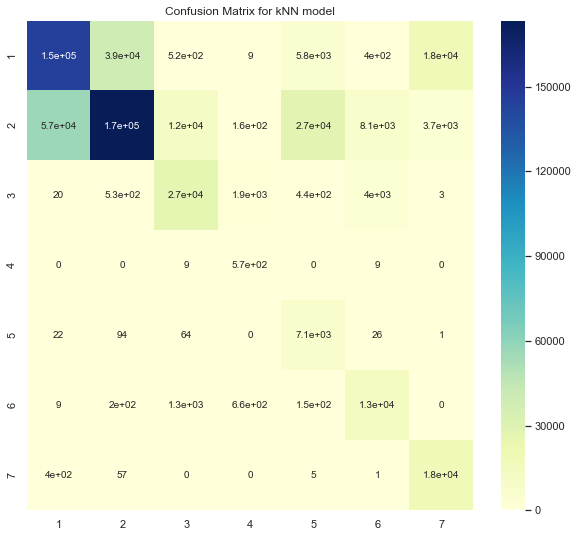

In [71]:
plot_cm(KNN_cm, "Confusion Matrix for kNN model")

In [29]:
#Define Random Forest function
def RandomForest(depth, state, X, y, test_X):  
    clf = RandomForestClassifier(max_depth=depth, random_state=state)
    clf.fit(X, y)
    return clf.predict(test_X)

In [138]:
#Set parameters for the best results
para_result = {}
for i in range(26,40,2):
    for j in [35, 40,45,50,55,60,65,70,75,80,85,90,95,100,105,110,115,120,125,130,135,140]:
        para = "max_depth is "+str(i)+ " and random_state is " + str(j)  
        RF_Y_prediction = RandomForest(i, j, train_X, train_Y, test_X)
        para_result[para] = cal_accuracy_score(test_Y,RF_Y_prediction)

/Users/xizheng/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/xizheng/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/xizheng/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/xizheng/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

/Users/xizheng/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/xizheng/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/xizheng/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/xizheng/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

/Users/xizheng/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/xizheng/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/xizheng/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/xizheng/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

/Users/xizheng/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/xizheng/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/xizheng/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/xizheng/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

/Users/xizheng/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/xizheng/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/xizheng/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/xizheng/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

/Users/xizheng/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/xizheng/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/xizheng/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/xizheng/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

/Users/xizheng/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/xizheng/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/xizheng/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/xizheng/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

/Users/xizheng/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/xizheng/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/xizheng/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/xizheng/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

/Users/xizheng/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/xizheng/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/xizheng/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/xizheng/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

/Users/xizheng/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/xizheng/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/xizheng/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/xizheng/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

/Users/xizheng/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/xizheng/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/xizheng/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/xizheng/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

In [139]:
sorted_para_result = sorted(para_result.items(), key=lambda x: x[1], reverse=True)

In [140]:
#Display the sorted results 
sorted_para_result

[('max_depth is 34 and random_state is 105', 0.7590070190071604),
 ('max_depth is 36 and random_state is 105', 0.7590070190071604),
 ('max_depth is 38 and random_state is 105', 0.7590070190071604),
 ('max_depth is 32 and random_state is 105', 0.7576339654916486),
 ('max_depth is 30 and random_state is 110', 0.7574095410431673),
 ('max_depth is 26 and random_state is 85', 0.7569006100103907),
 ('max_depth is 28 and random_state is 120', 0.7565206788574498),
 ('max_depth is 32 and random_state is 100', 0.7565047747626755),
 ('max_depth is 30 and random_state is 45', 0.7563952132208973),
 ('max_depth is 30 and random_state is 105', 0.7563916789776141),
 ('max_depth is 32 and random_state is 45', 0.7562679804627032),
 ('max_depth is 32 and random_state is 120', 0.7561831586239071),
 ('max_depth is 38 and random_state is 50', 0.7560930354201861),
 ('max_depth is 28 and random_state is 85', 0.7558845150664791),
 ('max_depth is 30 and random_state is 120', 0.7558703780933465),
 ('max_depth is

In [37]:
#Set parameters to the best option, calculate accuracy for each cover type
rf_cm = confusion_matrix(test_Y, RandomForest(34, 105, train_X, train_Y, test_X), labels=[1,2,3,4,5,6,7])
rf_accurate_cm = rf_cm.astype('float') / rf_cm.sum(axis=1)[:, np.newaxis]
a = 1
for i in rf_accurate_cm.diagonal():
    print("The accuracy for predicting type "+str(a) +" forest when using Random Forest is " + str(i) +".")
    a+=1

/Users/xizheng/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/xizheng/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


The accuracy for predicting type 1 forest when using Random Forest is 0.8005103014116749.
The accuracy for predicting type 2 forest when using Random Forest is 0.6894369729068333.
The accuracy for predicting type 3 forest when using Random Forest is 0.8741739596356493.
The accuracy for predicting type 4 forest when using Random Forest is 0.9727427597955707.
The accuracy for predicting type 5 forest when using Random Forest is 0.9566343924723851.
The accuracy for predicting type 6 forest when using Random Forest is 0.8551982639573881.
The accuracy for predicting type 7 forest when using Random Forest is 0.9742779291553133.


In [38]:
rf_cm

array([[167851,  27752,    142,      0,   3262,    239,  10434],
       [ 55290, 193829,   6127,     95,  18248,   6162,   1390],
       [     5,    288,  29367,   1202,    273,   2458,      1],
       [     0,      0,     13,    571,      0,      3,      0],
       [    16,    182,     80,      0,   7015,     40,      0],
       [     4,    103,   1609,    354,    132,  13005,      0],
       [   434,     32,      0,      0,      6,      0,  17878]])

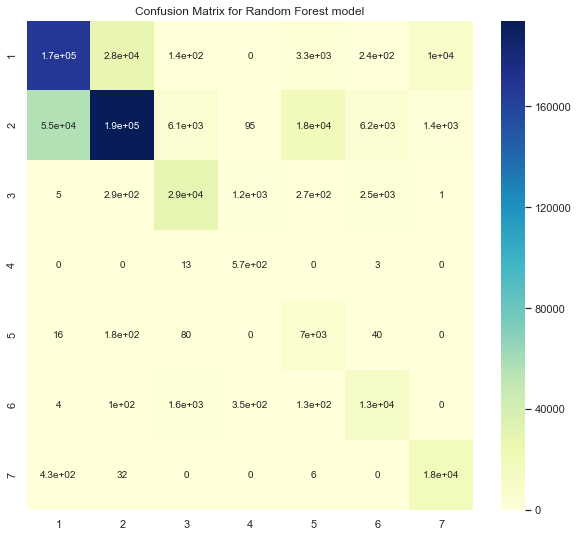

In [72]:
plot_cm(rf_cm, "Confusion Matrix for Random Forest model")

In [10]:
#Define linear SVM function using SKlearn
def Linear_SVM_model(t, state, X, y, test_X):  
    clf = LinearSVC(random_state=state, tol=t)
    clf.fit(X, y)
    return clf.predict(test_X)

In [11]:
#Tune parameters to calculate the best result
para_result3 = {}
for i in [0.00001, 0.00005,0.0001,0.0005,0.001, 0.005, 0.01,0.05]:
    for j in [120, 130,140,150,160]:
        para = "tolerance is "+str(i)+ " and random_state is " + str(j)  
        Linear_SVM_Y_prediction = Linear_SVM_model(i,j, train_X, train_Y, test_X)
        para_result3[para] = cal_accuracy_score(test_Y, Linear_SVM_Y_prediction)


/Users/xizheng/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/xizheng/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/xizheng/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/xizheng/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/xizheng/anacond

/Users/xizheng/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/xizheng/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/xizheng/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/xizheng/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/xizheng/anacond

/Users/xizheng/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/xizheng/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/xizheng/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/xizheng/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/xizheng/anacond

In [13]:
#Display the sorted results
sorted_para_result3 = sorted(para_result3.items(), key=lambda x: x[1], reverse=True)
sorted_para_result3

[('tolerance is 1e-05 and random_state is 140', 0.5286980554593456),
 ('tolerance is 5e-05 and random_state is 140', 0.5286980554593456),
 ('tolerance is 0.0001 and random_state is 140', 0.5286980554593456),
 ('tolerance is 0.0005 and random_state is 140', 0.5286980554593456),
 ('tolerance is 0.001 and random_state is 140', 0.5286980554593456),
 ('tolerance is 0.005 and random_state is 140', 0.5286980554593456),
 ('tolerance is 0.01 and random_state is 140', 0.5286980554593456),
 ('tolerance is 0.05 and random_state is 140', 0.5286980554593456),
 ('tolerance is 1e-05 and random_state is 120', 0.5028592028160851),
 ('tolerance is 5e-05 and random_state is 120', 0.5028592028160851),
 ('tolerance is 0.0001 and random_state is 120', 0.5028592028160851),
 ('tolerance is 0.0005 and random_state is 120', 0.5028592028160851),
 ('tolerance is 0.001 and random_state is 120', 0.5028592028160851),
 ('tolerance is 0.005 and random_state is 120', 0.5028592028160851),
 ('tolerance is 0.01 and random_

In [41]:
#Set parameters to the best option, calculate detailed accuracy
LSVM_cm = confusion_matrix(test_Y, Linear_SVM_model(1e-05, 240, train_X, train_Y, test_X), labels=[1,2,3,4,5,6,7])
LSVM_accurate_cm = LSVM_cm.astype('float') / LSVM_cm.sum(axis=1)[:, np.newaxis]
a = 1
for i in LSVM_accurate_cm.diagonal():
    print("The accuracy for predicting type "+str(a) +" forest when using Linear SVM model is " + str(i) +".")
    a+=1

/Users/xizheng/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/xizheng/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


The accuracy for predicting type 1 forest when using Linear SVM model is 0.4290061045402518.
The accuracy for predicting type 2 forest when using Linear SVM model is 0.36677681305821636.
The accuracy for predicting type 3 forest when using Linear SVM model is 0.017830564981841997.
The accuracy for predicting type 4 forest when using Linear SVM model is 0.979557069846678.
The accuracy for predicting type 5 forest when using Linear SVM model is 0.1568253102413746.
The accuracy for predicting type 6 forest when using Linear SVM model is 0.5678963635168015.
The accuracy for predicting type 7 forest when using Linear SVM model is 0.6226158038147139.


In [42]:
LSVM_cm

array([[ 89954,  71783,      9,   1811,   3403,  22744,  19976],
       [ 68223, 103116,    715,  18709,   8947,  77578,   3853],
       [   151,    822,    599,  20062,    273,  11680,      7],
       [     0,      0,      3,    575,      0,      9,      0],
       [  1396,   1122,      0,   1081,   1150,   2556,     28],
       [    31,     66,     29,   6376,     66,   8636,      3],
       [  3610,   2754,      0,      0,    202,    359,  11425]])

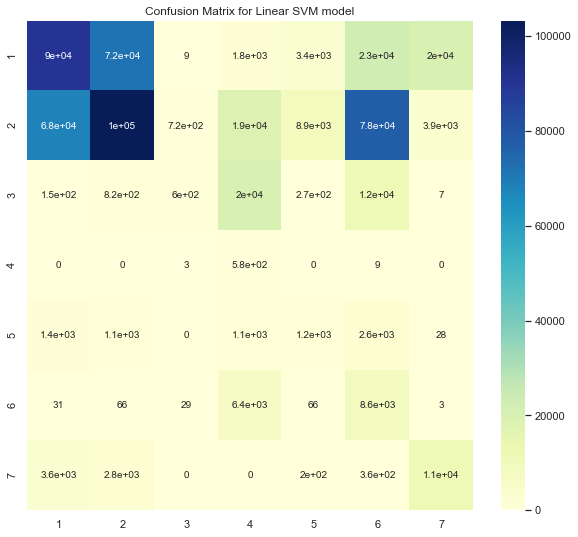

In [73]:
plot_cm(LSVM_cm, "Confusion Matrix for Linear SVM model")

In [25]:
#See each cover type's number in the test dataset
test_type_num = {"type 1":0,"type 2":0,"type 3":0,"type 4":0,"type 5":0,"type 6":0,"type 7":0}
for i in processed_test['Cover_Type']:
    if str(i) == "1":
        test_type_num["type 1"] += 1
    if str(i) == "2":
        test_type_num["type 2"] += 1
    if str(i) == "3":
        test_type_num["type 3"] += 1
    if str(i) == "4":
        test_type_num["type 4"] += 1
    if str(i) == "5":
        test_type_num["type 5"] += 1
    if str(i) == "6":
        test_type_num["type 6"] += 1
    if str(i) == "7":
        test_type_num["type 7"] += 1

In [26]:
test_type_num

{'type 1': 209680,
 'type 2': 281141,
 'type 3': 33594,
 'type 4': 587,
 'type 5': 7333,
 'type 6': 15207,
 'type 7': 18350}